In [1]:
# Libraries
# Standard Libraries
from collections import OrderedDict
import itertools

# Third-Party Libraries
import numpy as np 
import pandas as pd

import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from scipy.stats import pointbiserialr, spearmanr
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#import xgboost as xgb

# Data Exploration

In [2]:
location = "C:\\Users\\soccer7710\\Desktop\\Deep Health\\diabetes-training.csv"
train_data = pd.read_csv(location)
train_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392.0,8222157.0,Caucasian,Female,[0-10),?,6.0,25.0,1.0,1.0,...,No,No,No,No,No,No,No,No,No,NO
1,149190.0,55629189.0,Caucasian,Female,[10-20),?,1.0,1.0,7.0,3.0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410.0,86047875.0,AfricanAmerican,Female,[20-30),?,1.0,1.0,7.0,2.0,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364.0,82442376.0,Caucasian,Male,[30-40),?,1.0,1.0,7.0,2.0,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680.0,42519267.0,Caucasian,Male,[40-50),?,1.0,1.0,7.0,1.0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
# train_data.info()
# list(train_data.columns.values)

## Histograms

### Discharge Disposition ID Distribution

In [4]:
# plt.figure(figsize=(8, 15))
# cnt_admin_id = train_data["discharge_disposition_id"].value_counts()
# sns.barplot(cnt_admin_id.index, cnt_admin_id.values, alpha=0.8)
# plt.title("Discharge Disposition ID")
# plt.xlabel("Category", fontsize=12)
# plt.ylabel("Frequency", fontsize=12)

# plt.show()

### Admission Type ID Distribution

In [5]:
# plt.figure(figsize=(10, 15))
# cnt_gender = train_data["admission_type_id"].value_counts()
# sns.barplot(cnt_gender.index, cnt_gender.values, alpha=0.8)
# plt.ylabel("admission_type_id", fontsize=12)
# plt.title("Admission Type ID")
# plt.xlabel("Category", fontsize=12)
# plt.ylabel("Frequency")

# plt.show()

## Patient Data Descriptor

In [6]:
# plt.figure(figsize=(18, 15))
# plt.subplot(2, 2, 1)
# cnt_gender = train_data["gender"].value_counts()
# sns.barplot(cnt_gender.index, cnt_gender.values, alpha=0.8)
# plt.ylabel("Number of Occurrences", fontsize=12)
# plt.xlabel("Gender", fontsize=12)
# plt.xlabel("Category")
# plt.ylabel("Frequency")

# plt.subplot(2, 2, 2)
# cnt_race = train_data["race"].value_counts()
# sns.barplot(cnt_race.index, cnt_race.values, alpha=0.8)
# plt.ylabel("Number of Occurrences", fontsize=12)
# plt.xlabel("Race", fontsize=12)
# plt.xlabel("Category")
# plt.ylabel("Frequency")

# plt.subplot(2, 2, 3)
# cnt_age = train_data["age"].value_counts()
# sns.barplot(cnt_age.index, cnt_age.values, alpha=0.8)
# plt.ylabel("Number of Occurrences", fontsize=12)
# plt.xlabel("Age", fontsize=12)
# plt.ylabel("Frequency")

# plt.subplot(2, 2, 4)
# cnt_weight = train_data["weight"].value_counts()
# sns.barplot(cnt_weight.index, cnt_weight.values, alpha=0.8)
# plt.ylabel("Number of Occurrences", fontsize=12)
# plt.xlabel("Weight", fontsize=12)
# plt.ylabel("Frequency")

# plt.show()

## Hospital Descriptors

In [7]:
# plt.rc('font', size=12)
# fig = plt.figure(figsize=(20, 30))
# alpha = 0.7

# ax1 = plt.subplot2grid((6, 2), (0,0), colspan=1)
# cnt_time_in_hosp = train_data['time_in_hospital'].value_counts()
# sns.barplot(cnt_time_in_hosp.index, cnt_time_in_hosp.values, alpha=0.8)
# ax1.set_ylabel("Number of Occurrences", fontsize=12)
# ax1.set_xlabel("Time in Hospital", fontsize=12)

# ax2 = plt.subplot2grid((6, 2), (0, 1), colspan=1)
# cnt_payer_code = train_data['payer_code'].value_counts()
# sns.barplot(cnt_payer_code.index, cnt_payer_code.values, alpha=0.8)
# ax2.set_ylabel("Number of Occurrences", fontsize=12)
# ax2.set_xlabel("Payer Code", fontsize=12)

# ax3 = plt.subplot2grid((6, 2), (1, 0), colspan=2)
# cnt_med_spec = train_data['medical_specialty'].value_counts()
# g = sns.barplot(cnt_med_spec.index, cnt_med_spec.values, alpha=0.8)
# g.set_xticklabels(cnt_med_spec.index, rotation=90)
# ax3.set_ylabel("Number of Occurrences", fontsize=12)
# ax3.set_xlabel("Medical Specialty", fontsize=12)

# ax4 = plt.subplot2grid((6, 2), (2, 0), colspan=2)
# cnt_n_lab_proc = train_data["num_lab_procedures"].value_counts()
# g1 = sns.barplot(cnt_n_lab_proc.index, cnt_n_lab_proc.values, alpha=0.8)
# g1.set_xticklabels(cnt_med_spec.index, rotation=90)
# ax4.set_ylabel("Number of Occurrences", fontsize=12)
# ax4.set_xlabel("Number of Lab Procedures", fontsize=12)

# ax5 = plt.subplot2grid((6, 2), (3, 0), colspan=1)
# cnt_n_proc = train_data["num_procedures"].value_counts()
# sns.barplot(cnt_n_proc.index, cnt_n_proc.values, alpha=0.8)
# ax5.set_ylabel("Number of Occurrences", fontsize=12)
# ax5.set_xlabel("Number of Procesures", fontsize=12)

# ax6 = plt.subplot2grid((6, 2), (4, 0), colspan=2)
# cnt_n_med = train_data["num_medications"].value_counts()
# sns.barplot(cnt_n_med.index, cnt_n_med.values, alpha=0.8)
# ax6.set_ylabel("Number of Occurrences", fontsize=12)
# ax6.set_ylabel("Number of Medications", fontsize=12)

# ax7 = plt.subplot2grid((6, 2), (5, 0), colspan=1)
# cnt_n_outp = train_data["number_outpatient"].value_counts()
# sns.barplot(cnt_n_outp.index, cnt_n_outp.values, alpha=0.8)
# ax7.set_ylabel("Number of Occurrences", fontsize=12)
# ax7.set_ylabel("Number of Outpatients", fontsize=12)

# ax8 = plt.subplot2grid((6, 2), (5, 1), colspan=1)
# cnt_n_inp = train_data["number_inpatient"].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax8.set_ylabel("Number of Occurrences", fontsize=12)
# ax8.set_ylabel("Number of Inpatients", fontsize=12)

# plt.show()

In [8]:
# plt.rc('font', size=13)
# fig = plt.figure(figsize=(20, 20))
# alpha = 0.7

# ax1 = plt.subplot2grid((3, 3), (0,0), colspan=3)
# cnt_diag1 = train_data['diag_1'].value_counts()
# g = sns.barplot(cnt_diag1.index, cnt_diag1.values, alpha=0.8)
# g.set_xticklabels(cnt_diag1.index, rotation=90)
# ax1.set_ylabel("Number of Occurrences", fontsize=12)
# ax1.set_xlabel("Diag 1", fontsize=12)

# ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=3)
# cnt_diag2 = train_data['diag_2'].value_counts()
# g = sns.barplot(cnt_diag2.index, cnt_diag2.values, alpha=0.8)
# g.set_xticklabels(cnt_diag2.index, rotation=90)
# ax2.set_ylabel("Number of Occurrences", fontsize=12)
# ax2.set_xlabel("Diag 2", fontsize=12)

# # ax3 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
# # cnt_diag3 = train_data['diag_3'].value_counts()
# # g = sns.barplot(cnt_diag3.index, cnt_diag2.values, alpha=0.8)
# # g.set_xticklabels(cnt_diag3.index, rotation=90)
# # ax3.set_ylabel("Number of Occurrences", fontsize=12)
# # ax3.set_xlabel("Diag 3", fontsize=12)

# plt.show()

### Drugs

In [9]:
# plt.rc('font', size=12)
# fig = plt.figure(figsize=(20, 50))
# alpha = 0.7

# ax1 = plt.subplot2grid((14, 2), (0,0), colspan=2)
# cnt_num_diag = train_data['number_diagnoses'].value_counts()
# sns.barplot(cnt_num_diag.index, cnt_num_diag.values, alpha=0.8)
# ax1.set_ylabel("Number of Occurrences", fontsize=12)
# ax1.set_xlabel("Number of Diagnoses", fontsize=12)

# ax2 = plt.subplot2grid((14, 2), (1, 0), colspan=1)
# cnt_max_glu_serum = train_data['max_glu_serum'].value_counts()
# sns.barplot(cnt_max_glu_serum.index, cnt_max_glu_serum.values, alpha=0.8)
# ax2.set_ylabel("Number of Occurrences", fontsize=12)
# ax2.set_xlabel("Max Glu Serum", fontsize=12)

# ax3 = plt.subplot2grid((14, 2), (1, 1), colspan=1)
# cnt_A1Cresult = train_data['A1Cresult'].value_counts()
# g = sns.barplot(cnt_A1Cresult.index, cnt_A1Cresult.values, alpha=0.8)
# ax3.set_ylabel("Number of Occurrences", fontsize=12)
# ax3.set_xlabel("A1C result", fontsize=12)

# ax4 = plt.subplot2grid((14, 2), (2, 0), colspan=1)
# cnt_n_lab_proc = train_data['metformin'].value_counts()
# sns.barplot(cnt_n_lab_proc.index, cnt_n_lab_proc.values, alpha=0.8)
# ax4.set_ylabel("Number of Occurrences", fontsize=12)
# ax4.set_xlabel('Metformin', fontsize=12)

# ax5 = plt.subplot2grid((14, 2), (2, 1), colspan=1)
# cnt_n_lab_proc = train_data['repaglinide'].value_counts()
# sns.barplot(cnt_n_lab_proc.index, cnt_n_lab_proc.values, alpha=0.8)
# ax5.set_ylabel("Number of Occurrences", fontsize=12)
# ax5.set_xlabel('Repaglinide', fontsize=12)

# ax6 = plt.subplot2grid((14, 2), (3, 0), colspan=1)
# cnt_n_lab_proc = train_data['nateglinide'].value_counts()
# sns.barplot(cnt_n_lab_proc.index, cnt_n_lab_proc.values, alpha=0.8)
# ax6.set_ylabel("Number of Occurrences", fontsize=12)
# ax6.set_xlabel('Nateglinide', fontsize=12)

# ax7 = plt.subplot2grid((14, 2), (3, 1), colspan=1)
# cnt_n_lab_proc = train_data['chlorpropamide'].value_counts()
# sns.barplot(cnt_n_lab_proc.index, cnt_n_lab_proc.values, alpha=0.8)
# ax7.set_ylabel("Number of Occurrences", fontsize=12)
# ax7.set_xlabel('Chlorpropamide', fontsize=12)

# ax8 = plt.subplot2grid((14, 2), (4, 0), colspan=1)
# cnt_n_lab_proc = train_data['glimepiride'].value_counts()
# sns.barplot(cnt_n_lab_proc.index, cnt_n_lab_proc.values, alpha=0.8)
# ax8.set_ylabel("Number of Occurrences", fontsize=12)
# ax8.set_xlabel('Glimepiride', fontsize=12)

# ax9 = plt.subplot2grid((14, 2), (4, 1), colspan=1)
# cnt_n_lab_proc = train_data['acetohexamide'].value_counts()
# sns.barplot(cnt_n_lab_proc.index, cnt_n_lab_proc.values, alpha=0.8)
# ax9.set_ylabel("Number of Occurrences", fontsize=12)
# ax9.set_xlabel('Acetohexamide', fontsize=12)

# ax10 = plt.subplot2grid((14, 2), (5, 0), colspan=1)
# cnt_n_lab_proc = train_data['glipizide'].value_counts()
# sns.barplot(cnt_n_lab_proc.index, cnt_n_lab_proc.values, alpha=0.8)
# ax10.set_ylabel("Number of Occurrences", fontsize=12)
# ax10.set_xlabel('Glipizide', fontsize=12)

# ax11 = plt.subplot2grid((14, 2), (5, 1), colspan=1)
# cnt_n_inp = train_data['glyburide'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax11.set_ylabel("Number of Occurrences", fontsize=12)
# ax11.set_xlabel('Glyburide', fontsize=12)

# ax12 = plt.subplot2grid((14, 2), (6, 0), colspan=1)
# cnt_n_inp = train_data['tolbutamide'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax12.set_ylabel("Number of Occurrences", fontsize=12)
# ax12.set_xlabel('Tolbutamide', fontsize=12)

# ax13 = plt.subplot2grid((14, 2), (6, 1), colspan=1)
# cnt_n_inp = train_data['pioglitazone'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax13.set_ylabel("Number of Occurrences", fontsize=12)
# ax13.set_xlabel('Pioglitazone', fontsize=12)

# ax14 = plt.subplot2grid((14, 2), (7, 0), colspan=1)
# cnt_n_inp = train_data['rosiglitazone'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax14.set_ylabel("Number of Occurrences", fontsize=12)
# ax14.set_xlabel('Rosiglitazone', fontsize=12)

# ax15 = plt.subplot2grid((14, 2), (7, 1), colspan=1)
# cnt_n_inp = train_data['acarbose'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax15.set_ylabel("Number of Occurrences", fontsize=12)
# ax15.set_xlabel('Acarbose', fontsize=12)

# ax16 = plt.subplot2grid((14, 2), (8, 0), colspan=1)
# cnt_n_inp = train_data['miglitol'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax16.set_ylabel("Number of Occurrences", fontsize=12)
# ax16.set_xlabel('Miglitol', fontsize=12)

# ax17 = plt.subplot2grid((14, 2), (8, 1), colspan=1)
# cnt_n_inp = train_data['troglitazone'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax17.set_ylabel("Number of Occurrences", fontsize=12)
# ax17.set_xlabel('Troglitazone', fontsize=12)

# ax18 = plt.subplot2grid((14, 2), (9, 0), colspan=1)
# cnt_n_inp = train_data['tolazamide'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax18.set_ylabel("Number of Occurrences", fontsize=12)
# ax18.set_xlabel('Tolazamide', fontsize=12)

# ax19 = plt.subplot2grid((14, 2), (9, 1), colspan=1)
# cnt_n_inp = train_data['examide'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax19.set_ylabel("Number of Occurrences", fontsize=12)
# ax19.set_xlabel('Examide', fontsize=12)

# ax20 = plt.subplot2grid((14, 2), (10, 0), colspan=1)
# cnt_n_inp = train_data['citoglipton'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax20.set_ylabel("Number of Occurrences", fontsize=12)
# ax20.set_xlabel('Citoglipton', fontsize=12)

# ax21 = plt.subplot2grid((14, 2), (10, 1), colspan=1)
# cnt_n_inp = train_data['insulin'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax21.set_ylabel("Number of Occurrences", fontsize=12)
# ax21.set_xlabel('Insulin', fontsize=12)

# ax22 = plt.subplot2grid((14, 2), (11, 0), colspan=1)
# cnt_n_inp = train_data['glyburide-metformin'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax22.set_ylabel("Number of Occurrences", fontsize=12)
# ax22.set_xlabel('Glyburide Metformin', fontsize=12)

# ax23 = plt.subplot2grid((14, 2), (11, 1), colspan=1)
# cnt_n_inp = train_data['glipizide-metformin'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax23.set_ylabel("Number of Occurrences", fontsize=12)
# ax23.set_xlabel('Glipizide Metformin', fontsize=12)

# ax24 = plt.subplot2grid((14, 2), (12, 0), colspan=1)
# cnt_n_inp = train_data['glimepiride-pioglitazone'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax24.set_ylabel("Number of Occurrences", fontsize=12)
# ax24.set_xlabel('Glimepiride-Pioglitazone', fontsize=12)

# ax25 = plt.subplot2grid((14, 2), (12, 1), colspan=1)
# cnt_n_inp = train_data['metformin-rosiglitazone'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax25.set_ylabel("Number of Occurrences", fontsize=12)
# ax25.set_xlabel('Metformin-Rosiglitazone', fontsize=12)

# ax26 = plt.subplot2grid((14, 2), (13, 0), colspan=1)
# cnt_n_inp = train_data['metformin-pioglitazone'].value_counts()
# sns.barplot(cnt_n_inp.index, cnt_n_inp.values, alpha=0.8)
# ax26.set_ylabel("Number of Occurrences", fontsize=12)
# ax26.set_xlabel('Metformin-Pioglitazone', fontsize=12)

# plt.show()

## Data Cleanup

In [10]:
# Remove useless columns
train_data.drop(["encounter_id", "patient_nbr"], axis=1, inplace=True)
train_data.dropna(subset=['discharge_disposition_id', 'admission_type_id', "time_in_hospital", "num_lab_procedures",
                          "num_medications", "number_outpatient", "number_emergency", "number_inpatient", "number_diagnoses",
                          'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
                          'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
                          'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
                          "glyburide-metformin", 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                          "metformin-pioglitazone", 'change', 'diabetesMed', 'readmitted'], axis=0, inplace=True)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100702 entries, 0 to 100704
Data columns (total 48 columns):
race                        100702 non-null object
gender                      100702 non-null object
age                         100702 non-null object
weight                      100702 non-null object
admission_type_id           100702 non-null float64
discharge_disposition_id    100702 non-null float64
admission_source_id         100702 non-null float64
time_in_hospital            100702 non-null float64
payer_code                  100702 non-null object
medical_specialty           100702 non-null object
num_lab_procedures          100702 non-null float64
num_procedures              100702 non-null float64
num_medications             100702 non-null float64
number_outpatient           100702 non-null float64
number_emergency            100702 non-null float64
number_inpatient            100702 non-null float64
diag_1                      100702 non-null object
diag_2      

In [12]:
# print(train_data["gender"].value_counts())

In [13]:
train_data = train_data[train_data.gender != "Unknown/Invalid"]
train_data["gender"] = train_data["gender"].map({"Female":1, "Male":0})
# train_data["gender"].value_counts()

In [14]:
train_data["age"] = train_data["age"].map({"[0-10)":5,"[10-20)":15,"[20-30)":25,"[30-40)":35,
                                           "[40-50)":45,"[50-60)":55,"[60-70)":65,"[70-80)":75,"[80-90)":85})
# train_data["age"].value_counts()

In [15]:
train_data.drop("weight", axis=1, inplace=True) 

In [16]:
train_data["race"] = train_data["race"].map({"Caucasian":0,"AfricanAmerican": 1,"2": 2,"Hispanic": 3,
                                             "Other": 4,"Asian":5})
# train_data["race"].value_counts()

In [17]:
train_data["max_glu_serum"] = train_data["max_glu_serum"].map({"None":0, "Norm": 1, ">200": 2, ">300": 3})
train_data["A1Cresult"] = train_data["A1Cresult"].map({"None":0, "Norm": 1, ">7": 2, ">8": 3})
train_data["metformin"] = train_data["metformin"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
train_data["repaglinide"] = train_data["repaglinide"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
train_data["insulin"] = train_data["insulin"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
train_data["glimepiride"] = train_data["glimepiride"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
train_data["glipizide"] = train_data["glipizide"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
train_data["glyburide"] = train_data["glyburide"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3}) #
train_data["pioglitazone"] = train_data["pioglitazone"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
train_data["rosiglitazone"] = train_data["rosiglitazone"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
train_data["glimepiride-pioglitazone"] = train_data["glimepiride-pioglitazone"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
train_data["nateglinide"] = train_data["nateglinide"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
train_data["chlorpropamide"] = train_data["chlorpropamide"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
train_data["acetohexamide"] = train_data["acetohexamide"].map({"No":0, "Steady": 1})
train_data["tolbutamide"] = train_data["tolbutamide"].map({"No":0, "Steady": 1})
train_data["acarbose"] = train_data["acarbose"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
train_data["miglitol"] = train_data["miglitol"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
train_data["troglitazone"] = train_data["troglitazone"].map({"No":0, "Steady": 1})
train_data["tolazamide"] = train_data["tolazamide"].map({"No":0, "Steady": 1, "Up": 2})
train_data["examide"] = train_data["examide"].map({"No":0})
train_data["citoglipton"] = train_data["citoglipton"].map({"No":0})
train_data["glyburide-metformin"] = train_data["glyburide-metformin"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
train_data["glipizide-metformin"] = train_data["glipizide-metformin"].map({"No":0, "Steady": 1})
train_data["metformin-rosiglitazone"] = train_data["metformin-rosiglitazone"].map({"No":0, "Steady": 1})
train_data["metformin-pioglitazone"] = train_data["metformin-pioglitazone"].map({"No":0})

In [18]:
train_data["medical_spec_val"] = 0

train_data.medical_spec_val=pd.factorize(train_data.medical_specialty)[0]
train_data.medical_spec_val=pd.Categorical(pd.factorize(train_data.medical_specialty)[0])
#train_data.dtypes
#print(train_data.medical_spec_val)

train_data["payer_code_val"] = 0

train_data.payer_code_val=pd.factorize(train_data.payer_code)[0]
train_data.payer_code_val=pd.Categorical(pd.factorize(train_data.payer_code)[0])
#train_data.dtypes

med_spec_map = dict(zip(train_data["medical_specialty"], train_data.medical_spec_val))
payer_code_map = dict(zip(train_data["payer_code"], train_data.payer_code_val))

train_data["medical_specialty"] = train_data["medical_specialty"].map(med_spec_map)
train_data["payer_code"] = train_data["payer_code"].map(payer_code_map)

### Pair Plots

In [19]:
# palettes = itertools.cycle(sns.color_palette())
# sns.pairplot(data = train_data[["time_in_hospital","payer_code","medical_specialty",
#                                  "admission_type_id","num_lab_procedures","num_procedures",
#                                  "num_medications","number_outpatient","number_inpatient"]],
#               hue="admission_type_id", palette=palettes)

In [20]:
# palettes = itertools.cycle(sns.color_palette())
# sns.pairplot(data = train_data[["number_diagnoses","max_glu_serum","A1Cresult",
#                                 "repaglinide","nateglinide","chlorpropamide",
#                                 "acetohexamide","tolbutamide","acarbose","miglitol","troglitazone","tolazamide","examide","admission_type_id"]],
#              hue="admission_type_id", palette=palettes)

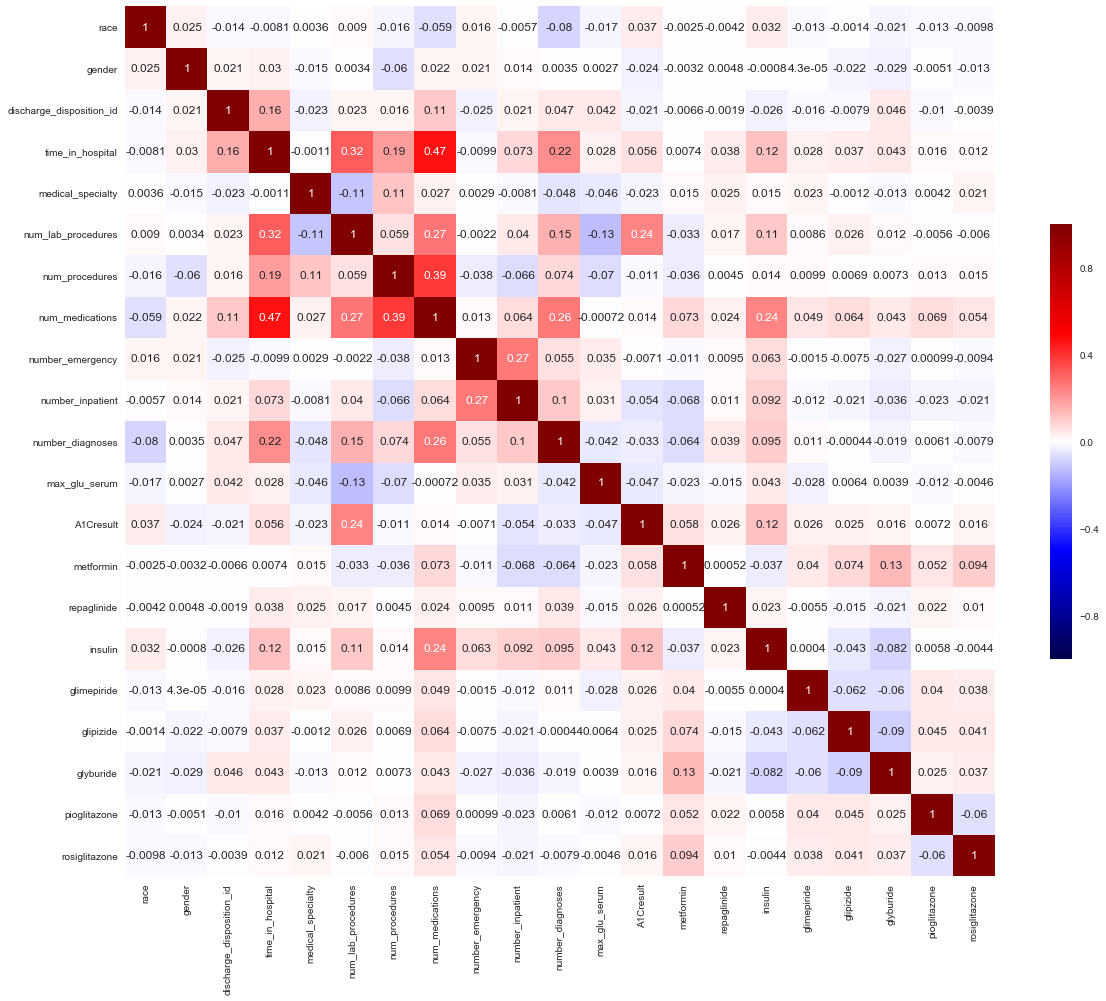

In [21]:
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize=(20, 16))
#     cmap = sns.diverging_palette(220, 10, as_cmap=True)
    _ = sns.heatmap(corr, 
                    cmap="seismic",
                    square=True, 
                    cbar_kws={'shrink': 0.5}, 
                    ax=ax, 
                    annot=True, 
                    annot_kws={'fontsize': 12})
    
plot_correlation_map(train_data[[
                     "race", 
                     "gender",
                     "discharge_disposition_id", 
                     "time_in_hospital", 
                     "medical_specialty", 
                     "num_lab_procedures",
                     "num_procedures",
                     "num_medications", 
                     "number_emergency", 
                     "number_inpatient", 
                     "diag_1",
                     "diag_2",
                     "diag_3", 
                     "number_diagnoses", 
                     "max_glu_serum", 
                     "A1Cresult", 
                     "metformin", 
                     "repaglinide", 
                     "insulin", 
                     "glimepiride", 
                     "glipizide", 
                     "glyburide", 
                     "pioglitazone",
                     "rosiglitazone"]])

In [22]:
train_data.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,medical_spec_val,payer_code_val
0,0.0,1,5.0,6.0,25.0,1.0,1.0,0,0,41.0,...,0,0,0,0,0,No,No,NO,0,0
1,0.0,1,15.0,1.0,1.0,7.0,3.0,0,1,59.0,...,0,0,0,0,0,Ch,Yes,>30,1,0
2,1.0,1,25.0,1.0,1.0,7.0,2.0,0,1,11.0,...,0,0,0,0,0,No,Yes,NO,1,0
3,0.0,0,35.0,1.0,1.0,7.0,2.0,0,1,44.0,...,0,0,0,0,0,Ch,Yes,NO,1,0
4,0.0,0,45.0,1.0,1.0,7.0,1.0,0,1,51.0,...,0,0,0,0,0,Ch,Yes,NO,1,0


In [23]:
# train_data.info()

In [24]:
train_data['number_inpatient'].loc[train_data['number_inpatient'] > 10.0] = 10.0
train_data['number_outpatient'].loc[train_data['number_outpatient'] > 10.0] = 10.0

cut_off = train_data["num_medications"].mean() + 3*train_data["num_medications"].std()
train_data["num_medications"].loc[train_data["num_medications"] > cut_off] = int(cut_off) + 1

C:\Users\soccer7710\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
# train_data["race"].value_counts()

In [26]:
a_features_wmedsp = ["race", 
                     "gender",
                     "discharge_disposition_id", 
                     "time_in_hospital", 
#                      "medical_specialty", 
                     "num_lab_procedures",
                     "num_procedures",
                     "num_medications", 
                     "number_emergency", 
                     "number_inpatient", 
#                      "diag_1",
#                      "diag_2",
#                      "diag_3", 
                     "number_diagnoses", 
                     "max_glu_serum", 
                     "A1Cresult", 
                     "metformin", 
                     "repaglinide", 
                     "insulin", 
                     "glimepiride", 
                     "glipizide", 
                     "glyburide", 
                     "pioglitazone",
                     "rosiglitazone"]

a_target_wmedsp = "admission_type_id"

In [27]:
train_data = train_data[np.isfinite(train_data["race"])]
X = train_data[a_features_wmedsp]
y = train_data[a_target_wmedsp]
y -= 1
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35, stratify=y)

0.0    52260
2.0    18332
1.0    17620
5.0     5199
4.0     4716
7.0      312
6.0       18
3.0       10
Name: admission_type_id, dtype: int64


In [28]:
X = X[np.isfinite(X['race'])]
np.any(np.isnan(X["race"]))
# np.all(np.isfinite(X["race"]))

False

In [29]:
# plt.figure(figsize=(15, 10))

# # Max Features
# plt.subplot(2, 3, 1)
# feature_param = range(1, 20)
# scores = []
# acc_scores = []
# for feature in feature_param:
#     clf = RandomForestClassifier(n_estimators=feature)
#     clf.fit(X_train, y_train)
#     y_pred = clf.predict_proba(X_test)
#     score = log_loss(y_test, y_pred)
#     acc = accuracy_score(y_test, np.argmax(y_pred, axis=1))
#     acc_scores.append(acc)
#     scores.append(score)
# plt.plot(feature_param, acc_scores, ".-", color="b")
# plt.plot(feature_param, scores, ".-", color="r")
# plt.axis("tight")
# plt.xlabel("parameter")
# plt.ylabel("score")
# plt.ylim(0, 0.2)
# plt.title("N Estimators")
# plt.grid()

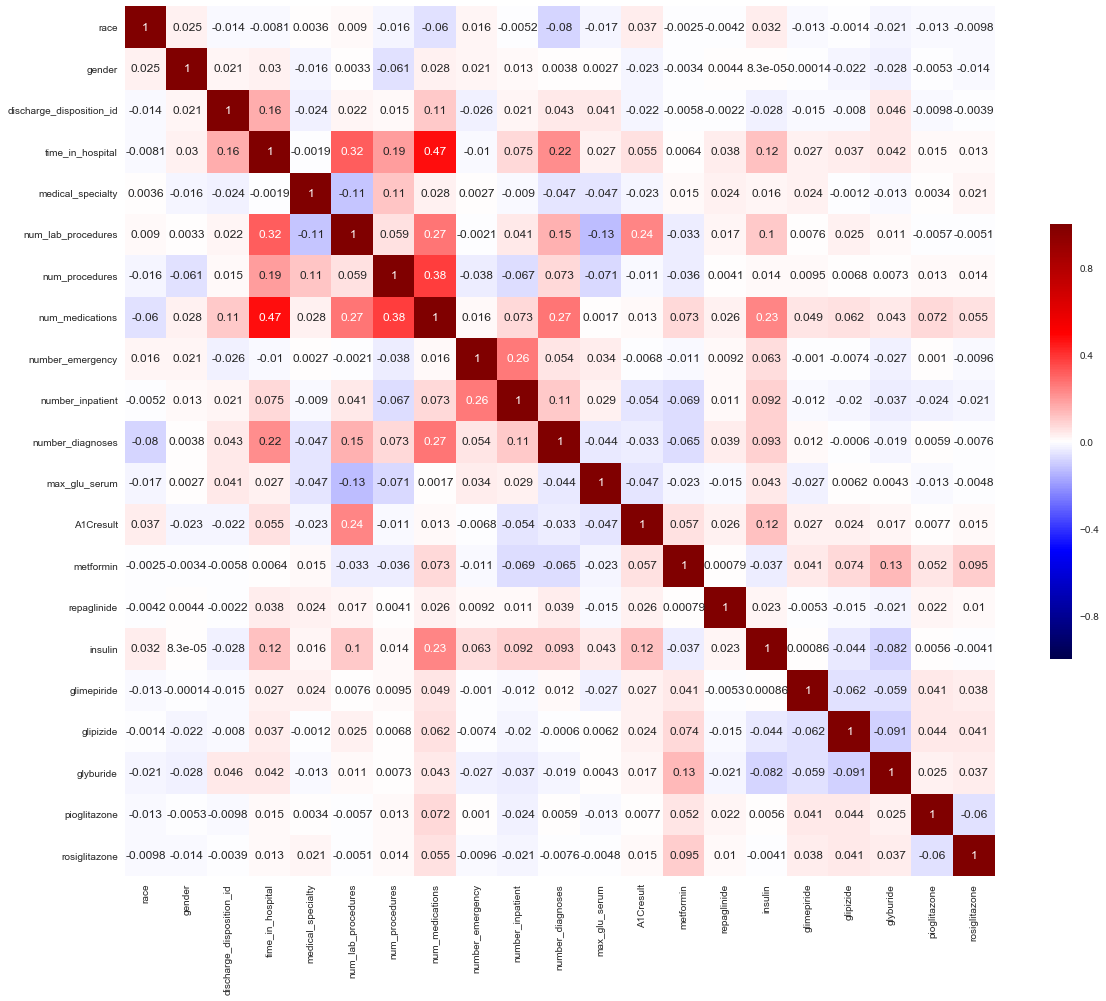

In [30]:
def plot_correlation_map(df):
    corr = df.corr()
    _ , ax = plt.subplots(figsize=(20, 16))
#     cmap = sns.diverging_palette(220, 10, as_cmap=True)
    _ = sns.heatmap(corr, 
                    cmap="seismic",
                    square=True, 
                    cbar_kws={'shrink': 0.5}, 
                    ax=ax, 
                    annot=True, 
                    annot_kws={'fontsize': 12})
    
plot_correlation_map(train_data[[
                     "race", 
                     "gender",
                     "discharge_disposition_id", 
                     "time_in_hospital", 
                     "medical_specialty", 
                     "num_lab_procedures",
                     "num_procedures",
                     "num_medications", 
                     "number_emergency", 
                     "number_inpatient", 
                     "diag_1",
                     "diag_2",
                     "diag_3", 
                     "number_diagnoses", 
                     "max_glu_serum", 
                     "A1Cresult", 
                     "metformin", 
                     "repaglinide", 
                     "insulin", 
                     "glimepiride", 
                     "glipizide", 
                     "glyburide", 
                     "pioglitazone",
                     "rosiglitazone"]])

# XGBoost

In [31]:
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)

In [32]:
# print("Train dataset contain {} rows and {} columns".format(dtrain.num_row(), dtrain.num_col()))
# print("Test dataset contain {} rows and {} columns".format(dtest.num_row(), dtest.num_col()))

In [33]:
# print("Train possible labels: ")
# print(np.unique(dtrain.get_label()))

# print("\nTest possible labels: ")
# print(np.unique(dtest.get_label()))

In [34]:
# params_default = {"objective": "multi:softprob",
#                   "eval_metric": "mlogloss",
#                   "num_class": 8, 
#                   "silent": 1, 
#                   "eta": 1.,
#                   "gamma": 0,
#                   "max_depth": 6,
#                   "min_child_weight": 1,
#                   "subsample": 1,
#                   "colsample_bytree": 0.8,
#                   "lambda": 1,
#                   "alpha": 0}

In [35]:
# # watchlist = [(dtest, 'test'), (dtrain, 'train')]
# bst = xgb.train(params_default, dtrain, num_boost_round=50)#, evals=watchlist)
# x_values = xgb.DMatrix(X_test)
# preds = bst.predict(x_values)

In [36]:
# plt.figure(figsize=(15, 15))

# # eta
# plt.subplot(3, 3, 1)
# params = params_default
# feature_param = np.linspace(0., 1, 10)
# scores = []
# acc_scores = []
# for feature in feature_param:
#     params["eta"] = feature
#     bst = xgb.train(params, dtrain, num_boost_round=20)
#     x_values = xgb.DMatrix(X_test)
#     preds = bst.predict(x_values)
#     score = log_loss(y_test, preds)
#     acc = accuracy_score(y_test, np.argmax(preds, axis=1))
#     acc_scores.append(acc)
#     scores.append(score)
# plt.plot(feature_param, acc_scores, ".-", color="b")
# plt.plot(feature_param, scores, ".-", color="r")
# plt.axis("tight")
# plt.xlabel("parameter")
# plt.ylabel("score")
# # plt.ylim(0.55, 0.75)
# plt.title("eta")
# plt.grid()

# # Gamma
# plt.subplot(3, 3, 2)
# params = params_default
# feature_param = range(0, 20)
# scores = []
# acc_scores = []
# for feature in feature_param:
#     params["gamma"] = feature
#     bst = xgb.train(params, dtrain, num_boost_round=20)
#     x_values = xgb.DMatrix(X_test)
#     preds = bst.predict(x_values)
#     score = log_loss(y_test, preds)
#     acc = accuracy_score(y_test, np.argmax(preds, axis=1))
#     acc_scores.append(acc)
#     scores.append(score)
# plt.plot(feature_param, acc_scores, ".-", color="b")
# plt.plot(feature_param, scores, ".-", color="r")
# plt.axis("tight")
# plt.xlabel("parameter")
# plt.ylabel("score")
# plt.title("gamma")
# plt.grid()

# # Max depth
# plt.subplot(3, 3, 3)
# params = params_default
# feature_param = range(1, 21)
# scores = []
# acc_scores = []
# for feature in feature_param:
#     params["max_depth"] = feature
#     bst = xgb.train(params, dtrain, num_boost_round=20)
#     x_values = xgb.DMatrix(X_test)
#     preds = bst.predict(x_values)
#     score = log_loss(y_test, preds)
#     acc = accuracy_score(y_test, np.argmax(preds, axis=1))
#     acc_scores.append(acc)
#     scores.append(score)
# plt.plot(feature_param, acc_scores, ".-", color="b")
# plt.plot(feature_param, scores, ".-", color="r")
# plt.axis("tight")
# plt.xlabel("parameter")
# plt.ylabel("score")
# plt.title("Max Depth")
# plt.grid()

# # Min Child Weight
# plt.subplot(3, 3, 4)
# params = params_default
# feature_param = range(1, 21)
# scores = []
# acc_scores = []
# for feature in feature_param:
#     params["min_child_weight"] = feature
#     bst = xgb.train(params, dtrain, num_boost_round=20)
#     x_values = xgb.DMatrix(X_test)
#     preds = bst.predict(x_values)
#     score = log_loss(y_test, preds)
#     acc = accuracy_score(y_test, np.argmax(preds, axis=1))
#     acc_scores.append(acc)
#     scores.append(score)
# plt.plot(feature_param, acc_scores, ".-", color="b")
# plt.plot(feature_param, scores, ".-", color="r")
# plt.axis("tight")
# plt.xlabel("parameter")
# plt.ylabel("score")
# plt.title("Min Child Weight")
# plt.grid()
           
# # Subsample
# plt.subplot(3, 3, 4)
# params = params_default
# feature_param = np.linspace(0., 1, 10)
# scores = []
# acc_scores = []
# for feature in feature_param:
#     params["subsample"] = feature
#     bst = xgb.train(params, dtrain, num_boost_round=20)
#     x_values = xgb.DMatrix(X_test)
#     preds = bst.predict(x_values)
#     score = log_loss(y_test, preds)
#     acc = accuracy_score(y_test, np.argmax(preds, axis=1))
#     acc_scores.append(acc)
#     scores.append(score)
# plt.plot(feature_param, acc_scores, ".-", color="b")
# plt.plot(feature_param, scores, ".-", color="r")
# plt.axis("tight")
# plt.xlabel("parameter")
# plt.ylabel("score")
# plt.title("Subsample")
# plt.grid()

# # Lambda
# plt.subplot(3, 3, 5)
# params = params_default
# feature_param = np.linspace(0., 1, 10)
# scores = []
# acc_scores = []
# for feature in feature_param:
#     params["lambda"] = feature
#     bst = xgb.train(params, dtrain, num_boost_round=20)
#     x_values = xgb.DMatrix(X_test)
#     preds = bst.predict(x_values)
#     score = log_loss(y_test, preds)
#     acc = accuracy_score(y_test, np.argmax(preds, axis=1))
#     acc_scores.append(acc)
#     scores.append(score)
# plt.plot(feature_param, acc_scores, ".-", color="b")
# plt.plot(feature_param, scores, ".-", color="r")
# plt.axis("tight")
# plt.xlabel("parameter")
# plt.ylabel("score")
# plt.title("Lambda")
# plt.grid()

# # Alpha
# plt.subplot(3, 3, 6)
# params = params_default
# feature_param = np.linspace(0., 1, 10)
# scores = []
# acc_scores = []
# for feature in feature_param:
#     params["alpha"] = feature
#     bst = xgb.train(params, dtrain, num_boost_round=20)
#     x_values = xgb.DMatrix(X_test)
#     preds = bst.predict(x_values)
#     score = log_loss(y_test, preds)
#     acc = accuracy_score(y_test, np.argmax(preds, axis=1))
#     acc_scores.append(acc)
#     scores.append(score)
# plt.plot(feature_param, acc_scores, ".-", color="b")
# plt.plot(feature_param, scores, ".-", color="r")
# plt.axis("tight")
# plt.xlabel("parameter")
# plt.ylabel("score")
# plt.title("Alpha")
# plt.grid()

# plt.subplot(3, 3, 7)
# params = params_default
# feature_param = range(1, 51)
# scores = []
# acc_scores = []
# for feature in feature_param:
#     bst = xgb.train(params, dtrain, num_boost_round=feature)
#     x_values = xgb.DMatrix(X_test)
#     preds = bst.predict(x_values)
#     score = log_loss(y_test, preds)
#     acc = accuracy_score(y_test, np.argmax(preds, axis=1))
#     acc_scores.append(acc)
#     scores.append(score)
# plt.plot(feature_param, acc_scores, ".-", color="b")
# plt.plot(feature_param, scores, ".-", color="r")
# plt.axis("tight")
# plt.xlabel("parameter")
# plt.ylabel("score")
# plt.title("Number of boosting rounds")
# plt.grid()

# plt.show()

In [37]:
# params_optimal = {"objective": "multi:softmax",
#                   "eval_metric": "mlogloss",
#                   "num_class": 8, 
#                   "silent": 1, 
#                   "eta": 0.4,
#                   "gamma": 4,
#                   "max_depth": 5,
#                   "min_child_weight": 1,
#                   "subsample": 1,
#                   "colsample_bytree": 0.8,
#                   "lambda": 1,
#                   "alpha": 0}

# # watchlist = [(dtest, 'test'), (dtrain, 'train')]
# bst = xgb.train(params_optimal, dtrain, num_boost_round=50)#, evals=watchlist)
# x_values = xgb.DMatrix(X_test)
# preds = bst.predict(x_values)
# score = log_loss(y_test, preds)
# acc = accuracy_score(y_test, np.argmax(preds, axis=1))
# # print(score)
# # print(acc)

In [38]:
# location_test = "E:\\Projects\\Hackathon\\diabetes-problem-1.csv"
# test_data = pd.read_csv(location_test)
# test_data.head()

In [39]:
# test_data.fillna(999)
# test_data["rosiglitazone"].value_counts()

In [40]:
# test_data.drop(["encounter_id", "patient_nbr"], axis=1, inplace=True)
# # test_data.dropna(subset=['discharge_disposition_id', 'admission_type_id', "time_in_hospital", "num_lab_procedures",
# #                           "num_medications", "number_outpatient", "number_emergency", "number_inpatient", "number_diagnoses",
# #                           'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
# #                           'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone',
# #                           'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
# #                           "glyburide-metformin", 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
# #                           "metformin-pioglitazone", 'change', 'diabetesMed', 'readmitted'], axis=0, inplace=True)


# # test_data = train_data[train_data.gender != "Unknown/Invalid"]
# # test_data["gender"] = train_data["gender"].map({"Female":1, "Male":0})
# # # train_data["gender"].value_counts()

# # test_data["age"] = train_data["age"].map({"[0-10)":5,"[10-20)":15,"[20-30)":25,"[30-40)":35,
# #                                            "[40-50)":45,"[50-60)":55,"[60-70)":65,"[70-80)":75,"[80-90)":85})
# # # train_data["age"].value_counts()

# # test_data.drop("weight", axis=1, inplace=True) 

# # test_data["race"] = train_data["race"].map({"Caucasian":0, "AfricanAmerican": 1,"2": 2,"Hispanic": 3,
# #                                            "Other": 4,"Asian":5, "?": 6})
# # test_data["race"].value_counts()

# # test_data["max_glu_serum"] = train_data["max_glu_serum"].map({"None":0, "Norm": 1, ">200": 2, ">300": 3})
# # test_data["A1Cresult"] = train_data["A1Cresult"].map({"None":0, "Norm": 1, ">7": 2, ">8": 3})
# # test_data["metformin"] = train_data["metformin"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
# # test_data["repaglinide"] = train_data["repaglinide"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
# # test_data["insulin"] = train_data["insulin"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
# # test_data["glimepiride"] = train_data["glimepiride"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
# # test_data["glipizide"] = train_data["glipizide"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
# # test_data["glyburide"] = train_data["glyburide"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3}) #
# # test_data["pioglitazone"] = train_data["pioglitazone"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})
# # test_data["rosiglitazone"] = train_data["rosiglitazone"].map({"No":0, "Steady": 1, "Up": 2, "Down": 3})

# # test_data["medical_spec_val"] = 0

# # test_data.medical_spec_val=pd.factorize(train_data.medical_specialty)[0]
# # test_data.medical_spec_val=pd.Categorical(pd.factorize(train_data.medical_specialty)[0])
# # #train_data.dtypes
# # #print(train_data.medical_spec_val)

# # test_data["payer_code_val"] = 0

# # test_data.payer_code_val=pd.factorize(train_data.payer_code)[0]
# # test_data.payer_code_val=pd.Categorical(pd.factorize(train_data.payer_code)[0])
# # #train_data.dtypes

# # med_spec_map = dict(zip(test_data["medical_specialty"], test_data.medical_spec_val))
# # payer_code_map = dict(zip(test_data["payer_code"], test_data.payer_code_val))

# # test_data["medical_specialty"] = test_data["medical_specialty"].map(med_spec_map)
# # test_data["payer_code"] = test_data["payer_code"].map(payer_code_map)

# # test_data['number_inpatient'].loc[test_data['number_inpatient'] > 10.0] = 10.0
# # test_data['number_outpatient'].loc[test_data['number_outpatient'] > 10.0] = 10.0

# # cut_off = test_data["num_medications"].mean() + 3*test_data["num_medications"].std()
# # test_data["num_medications"].loc[train_data["num_medications"] > cut_off] = int(cut_off) + 1

# # train_data["race"].value_counts()

# # a_features_wmedsp = ["race", 
# #                      "gender",
# #                      "discharge_disposition_id", 
# #                      "time_in_hospital", 
# # #                      "medical_specialty", 
# #                      "num_lab_procedures",
# #                      "num_procedures",
# #                      "num_medications", 
# #                      "number_emergency", 
# #                      "number_inpatient", 
# # #                      "diag_1",
# # #                      "diag_2",
# # #                      "diag_3", 
# #                      "number_diagnoses", 
# #                      "max_glu_serum", 
# #                      "A1Cresult", 
# #                      "metformin", 
# #                      "repaglinide", 
# #                      "insulin", 
# #                      "glimepiride", 
# #                      "glipizide", 
# #                      "glyburide", 
# #                      "pioglitazone",
# #                      "rosiglitazone"]

# # a_target_wmedsp = "admission_type_id"

# # test_data = test_data[np.isfinite(test_data["race"])]
# # X = test_data[a_features_wmedsp]
# # y = test_data[a_target_wmedsp]
# # y -= 1

In [46]:
target = train_data['admission_type_id']
data = train_data[[  "race", 
                     "gender",
                     "discharge_disposition_id", 
                     "time_in_hospital", 
                     "medical_specialty", 
                     "num_lab_procedures",
                     "num_procedures",
                     "num_medications", 
                     "number_emergency", 
                     "number_inpatient", 
                     "number_diagnoses", 
                     "max_glu_serum", 
                     "A1Cresult", 
                     "metformin", 
                     "repaglinide", 
                     "insulin", 
                     "glimepiride", 
                     "glipizide", 
                     "glyburide", 
                     "pioglitazone",
                     "rosiglitazone"]]

In [50]:
X = data

# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X)

# Invoke the TSNE method
# tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
# tsne_results = tsne.fit_transform(X)

[t-SNE] Computing pairwise distances...


MemoryError: 

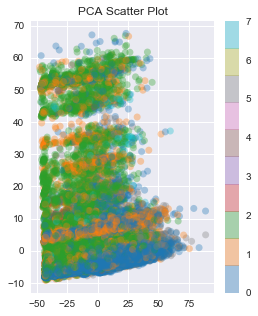

In [49]:
# Plot the TSNE and PCA visuals side-by-side
plt.figure(figsize=(9, 5))
plt.subplot(121)
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=target, cmap="Vega10", edgecolor="None", alpha=0.35)
plt.colorbar()
plt.title("PCA Scatter Plot")
# plt.subplot(122)
# plt.scatter(tsne_results[:,0], tsne_results[:,1], c=target, cmap="Vega10", edgecolor="None", alpha=0.35)
# plt.colorbar()
# plt.title("TSNE Scatter Plot")
plt.show()